## CUREYA TASK 7 

TWITTER SENTIMENT ANALYSIS

In [23]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
#Importing Dataset
col_names=["target", "id", "date", "flag", "user", "text"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv', names=col_names)

In [7]:
#determines rows & columns
df.shape

(1600000, 6)

In [8]:
#prints first 5 rows
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
#prints last 5 rows
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [10]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
#describes the whole dataset
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [12]:
#Checking the null values in dataset
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

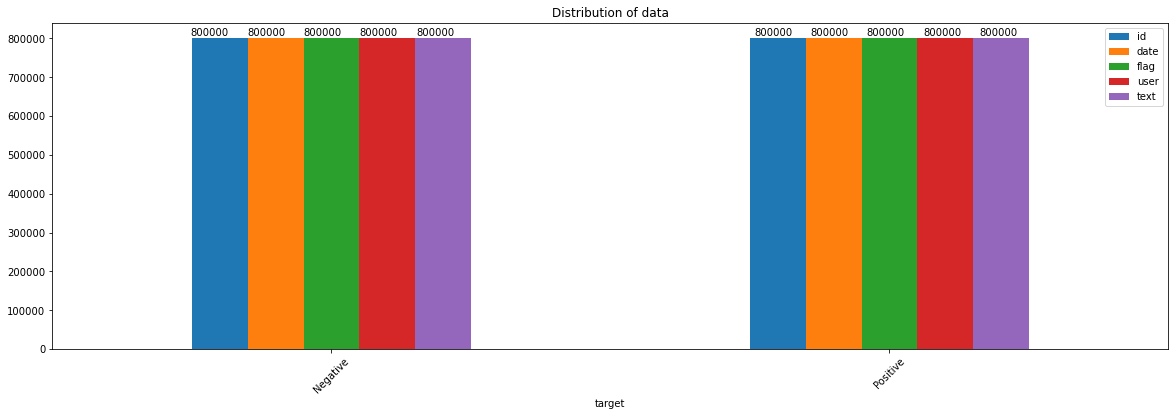

In [36]:
#Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 6))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

## Data Cleaning 

In [30]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [31]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [32]:
data['target'].unique()

array([0, 1], dtype=int64)

In [33]:
data_pos = data[data['target'] == 1]
data_pos.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [34]:
data_neg = data[data['target'] == 0]
data_neg.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [35]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [37]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].sample(5)

867659     @nik_kee_dee be nice!!! it's the only way to b...
275256     i really want @katyperry 's cardigan with the ...
431412     @usmcwife8999 @whiskey_kitten no definitely no...
1055135    @frostyinleeds oh cool, well ill be revising b...
108205     enjoying the deconstruction of eurovision the ...
Name: text, dtype: object

In [38]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].sample(5)

694068    urtherevolution except for the rain   but hell...
977297                                is thinking bout yoo 
194796    is trying to upload photos from last night but...
73792                                 up for hours already 
612396             just woke up on my way to the gym tired 
Name: text, dtype: object

In [39]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [40]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [41]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000             i love healthuandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004        lovesbrooklyn he has that effect on everyone 
Name: text, dtype: object

In [42]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             i love healthuandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004        lovesbrooklyn he has that effect on everyone 
Name: text, dtype: object

In [43]:
X=dataset.text
X.sample(5)

936488           lauzziem the tea pee im sooo offened lmaoo 
656117     signed up for my quotnewquot coarse in college...
889248                getfancy hahaha good morning sunshine 
1466130    crazy day sunday school picnic right after the...
807553               ffmpeg hall of shame gt http shamehtml 
Name: text, dtype: object

In [44]:
y=dataset.target
y.sample(5)

1105159    1
1406844    1
525020     0
1196815    1
129343     0
Name: target, dtype: int64

## Data Visualization 

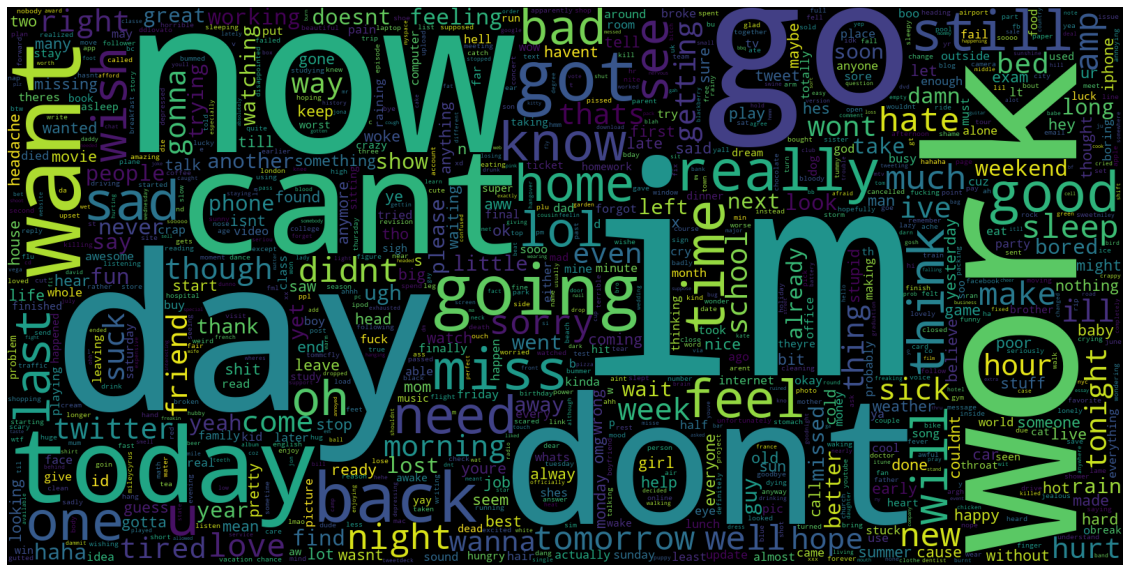

In [45]:
data_neg = dataset[dataset['target']==0]['text']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(wc);

Negative Words

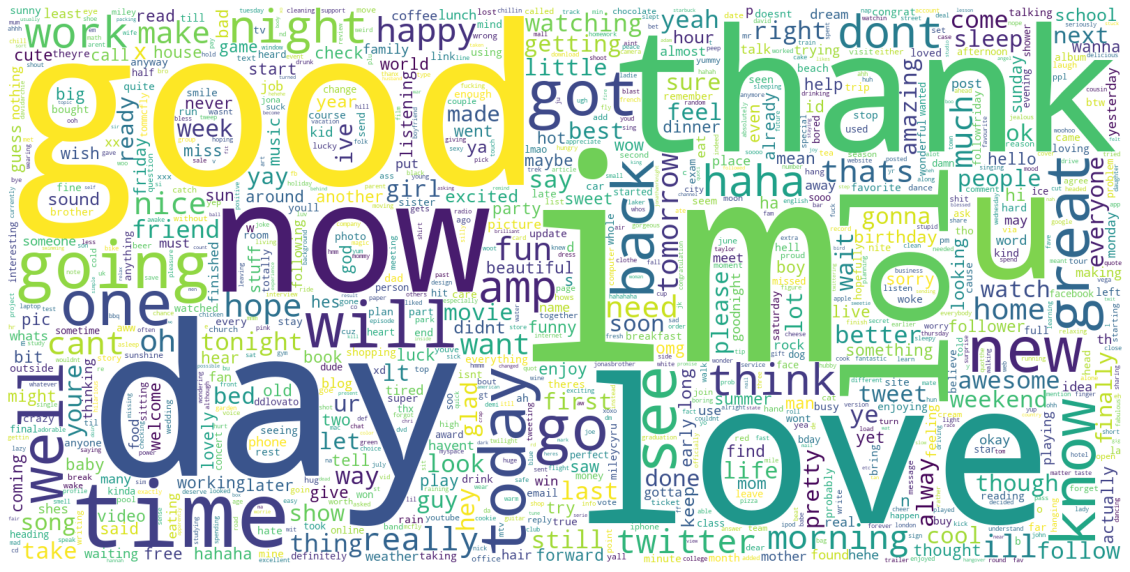

In [46]:
data_pos = dataset[dataset['target']==1]['text']
wc = WordCloud(background_color = 'white', max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(wc);

Positive Words

## Splitting, Training & Testing 

In [48]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1440000,), (160000,), (1440000,), (160000,))

In [50]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  50000


In [51]:
X_train = vectoriser.transform(X_train)
X_train

<1440000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 23304890 stored elements in Compressed Sparse Row format>

In [52]:
X_test  = vectoriser.transform(X_test)
X_test

<160000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 2584780 stored elements in Compressed Sparse Row format>

## Bernoulli Model 

In [53]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     80000
           1       0.78      0.81      0.79     80000

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



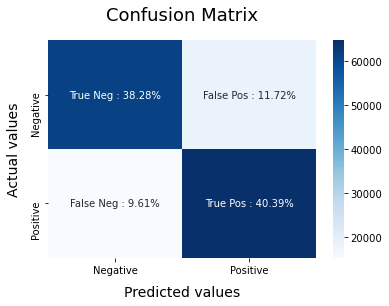

In [54]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

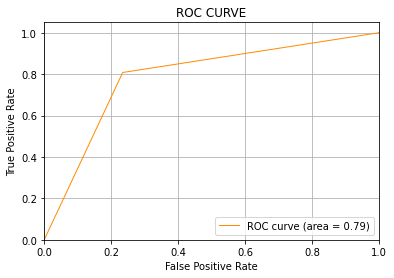

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

## Linear support vector classification 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     80000
           1       0.81      0.83      0.82     80000

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



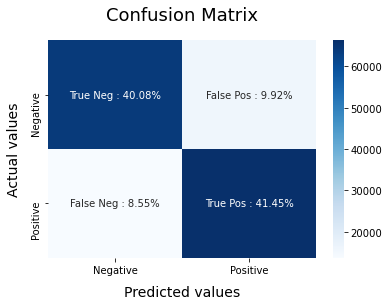

In [56]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

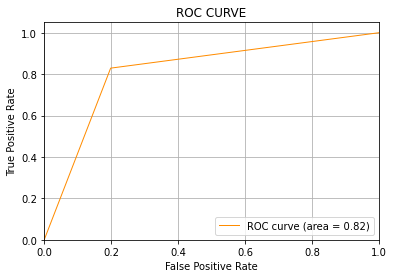

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     80000
           1       0.81      0.83      0.82     80000

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



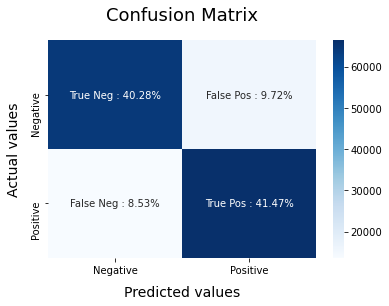

In [58]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

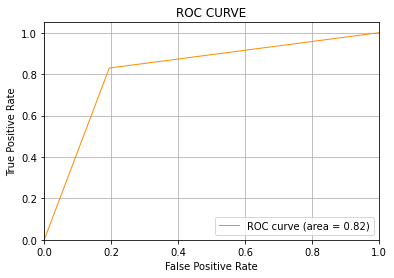

In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid()